In [1]:
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
with open("wiki_us.txt",'r', encoding='utf-8') as txt:
    sentences = txt.readlines()
    


print(f"Number of sentences {len(sentences)}")

print(f"First sentence from text file \n {sentences[0]}")

Number of sentences 9
First sentence from text file 
 The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.



In [5]:
print(f"Second \n {sentences[0]}")

for index in range(len(sentences)):
    sentences[index] = re.sub("[^a-zA-Z]"," ", str(sentences[index]))
    
print(f"Second sentence from text file \n {sentences[0]}")

Second 
 The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Second sentence from text file 
 The United States of America  U S A  or USA   commonly known as the United States  U S  or US  or America  is a country primarily located in North America  It consists o

In [6]:
word_tokenizer = []
for sent in sentences:
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)
    
print(f"First sentence from text file \n {word_tokenizer[0]}")

First sentence from text file 
 ['The', 'United', 'States', 'of', 'America', 'U', 'S', 'A', 'or', 'USA', 'commonly', 'known', 'as', 'the', 'United', 'States', 'U', 'S', 'or', 'US', 'or', 'America', 'is', 'a', 'country', 'primarily', 'located', 'in', 'North', 'America', 'It', 'consists', 'of', 'states', 'a', 'federal', 'district', 'five', 'major', 'unincorporated', 'territories', 'Indian', 'reservations', 'and', 'some', 'minor', 'possessions', 'j', 'At', 'million', 'square', 'miles', 'million', 'square', 'kilometers', 'it', 'is', 'the', 'world', 's', 'third', 'or', 'fourth', 'largest', 'country', 'by', 'total', 'area', 'd', 'The', 'United', 'States', 'shares', 'significant', 'land', 'borders', 'with', 'Canada', 'to', 'the', 'north', 'and', 'Mexico', 'to', 'the', 'south', 'as', 'well', 'as', 'limited', 'maritime', 'borders', 'with', 'the', 'Bahamas', 'Cuba', 'and', 'Russia', 'With', 'a', 'population', 'of', 'more', 'than', 'million', 'people', 'it', 'is', 'the', 'third', 'most', 'populou

In [8]:
from gensim.models import Word2Vec
model_cbow = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,#number dimension default 100
                     window=2, #default 5
                     min_count=2, #mini count words to be consider default 5
                     workers=1, #default 3
                     sg=0 #0 for CBOW, 1 SKIP-Gram
                     )

words_cbow = list(model_cbow.wv.index_to_key)
print(f"Total number of words {len(words_cbow)}")
print(words_cbow)

model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)

Total number of words 63
['the', 'of', 'and', 'a', 'is', 'United', 'States', 'The', 'in', 'War', 'world', 'country', 's', 'to', 'as', 'largest', 'by', 'with', 'it', 'American', 'S', 'America', 'U', 'or', 'total', 'military', 'population', 'North', 'World', 'million', 'th', 'century', 'established', 'has', 'It', 'its', 'third', 'Soviet', 'Nations', 'Union', 'member', 'federal', 'international', 'high', 'states', 'second', 'territories', 'most', 'led', 'political', 'began', 'from', 'capital', 'populous', 'than', 'Cold', 'more', 'wealth', 'borders', 'new', 'power', 'square', 'global']


array([[-2.07128916e-02,  1.88025497e-02],
       [ 2.58897781e-01,  4.60219502e-01],
       [-4.61873800e-01, -3.45615566e-01],
       [ 3.22566777e-01,  4.50737208e-01],
       [-2.47558340e-01, -1.81219295e-01],
       [ 3.69640648e-01, -7.35363811e-02],
       [-2.25857228e-01,  3.28645557e-01],
       [-2.40683198e-01, -8.87840986e-02],
       [ 1.46887690e-01,  5.28025255e-02],
       [-4.12871510e-01, -4.68649894e-01],
       [ 3.68163228e-01,  2.57369757e-01],
       [ 3.39388162e-01,  4.42387350e-02],
       [ 3.21730524e-01, -1.67285740e-01],
       [-4.62105796e-02,  2.89348871e-01],
       [-3.74888033e-01, -1.95416480e-01],
       [-3.75946164e-01, -4.33448032e-02],
       [ 4.78054106e-01, -3.63248736e-01],
       [-1.16009764e-01, -9.49834585e-02],
       [ 4.04676199e-01, -2.94679552e-01],
       [ 4.07236908e-03, -2.33279884e-01],
       [-4.79053795e-01,  2.52652824e-01],
       [-4.37373221e-01, -2.17763543e-01],
       [-7.89436162e-05, -1.27917798e-02],
       [-3.

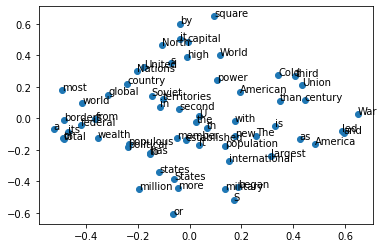

In [13]:
X = model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.index_to_key)
for i, word in enumerate(words_cbow[:100]):
    plt.annotate(word,xy=(result[i,0], result[i,1]))
plt.show()

In [14]:
from gensim.models import Word2Vec
model_skip = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,
                     window=2,
                     min_count=2,
                     workers=1,
                     sg=1
                     )

words = list(model_skip.wv.key_to_index)
print(f"Total number of words {len(words)}")

print(model_skip.wv.__getitem__('America'))

Total number of words 63
[-0.42989433 -0.2179319 ]


# Word2Vec avec Skip-Gram

In [15]:
from gensim.models import Word2Vec

In [16]:
model_skip = Word2Vec(sentences=word_tokenizer,
                     vector_size=2,#number dimension default 100
                     window=2, #default 5
                     min_count=4, #mini count words to be consider default 5
                     workers=1, #default 3
                     sg=1 #0 for CBOW, 1 SKIP-Gram
                     )

words = list(model_skip.wv.key_to_index)
print(f"Total number of words {len(words)}")

wordembedding=model_skip.wv.__getitem__('America')
print(wordembedding)

Total number of words 24
[-0.38858283  0.48585713]


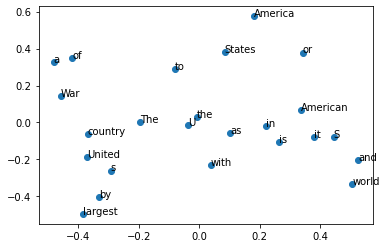

In [17]:
X = model_skip.wv.__getitem__(model_skip.wv.index_to_key)

pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.index_to_key)
for i, word in enumerate(words_skip[:100]):
    plt.annotate(word,xy=(result[i,0], result[i,1]))
plt.show()

# Google word2vec

In [18]:
from gensim.models import KeyedVectors


In [20]:
filename="GoogleNews-vectors-negative300.bin.gz"
model=KeyedVectors.load_word2vec_format(filename,binary=True)

In [21]:
#juste predict or word from king-man+women=?
result=model.most_similar(positive=["woman","king"],negative=["man"],topn=1)
print(f"Result ? mark in the following sentences King-Man= ? - woman :-{result}")

Result ? mark in the following sentences King-Man= ? - woman :-[('queen', 0.7118193507194519)]


# Standford Glove Embeddings